In this notebook we import the MET-EMT maboss model (bnd and cfg) and with CoLoMoTo tools we transform into a biolqm format. We then perform steady state analysis and visualise these states in a PCA plot. Code for final figure of steady states in emp_plots.R

In [1]:
import maboss
import ginsim
import biolqm 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import random
random.seed(10)
from colomoto_jupyter import tabulate
from sklearn.decomposition import PCA

In [2]:
# Model
model = maboss.load("./network.bnd", "./network.cfg")
param = {'max_time': 200, 'time_tick': 1, 'sample_count': 10000, 'thread_count':6}
model.param.update(param)

In [3]:
def convert_and_show(model):   
    biolqm_model = maboss.to_biolqm(model)
    lrg = biolqm.to_ginsim(biolqm_model)
    return ginsim.show(lrg)
def convert_and_export(model):   
    biolqm_model = maboss.to_biolqm(model)
    biolqm.save(biolqm_model, "mymodel.bnet", "bnet")
    return

Show network in ginsim format

In [76]:
convert_and_export(model)
convert_and_show(model)

In [77]:
model = biolqm.load("./mymodel.bnet")

Plot the 25 fixed points

In [78]:
fps = biolqm.fixpoints(model)
print(len(fps), "fixpoints")

fps_df=tabulate(fps)

25 fixpoints


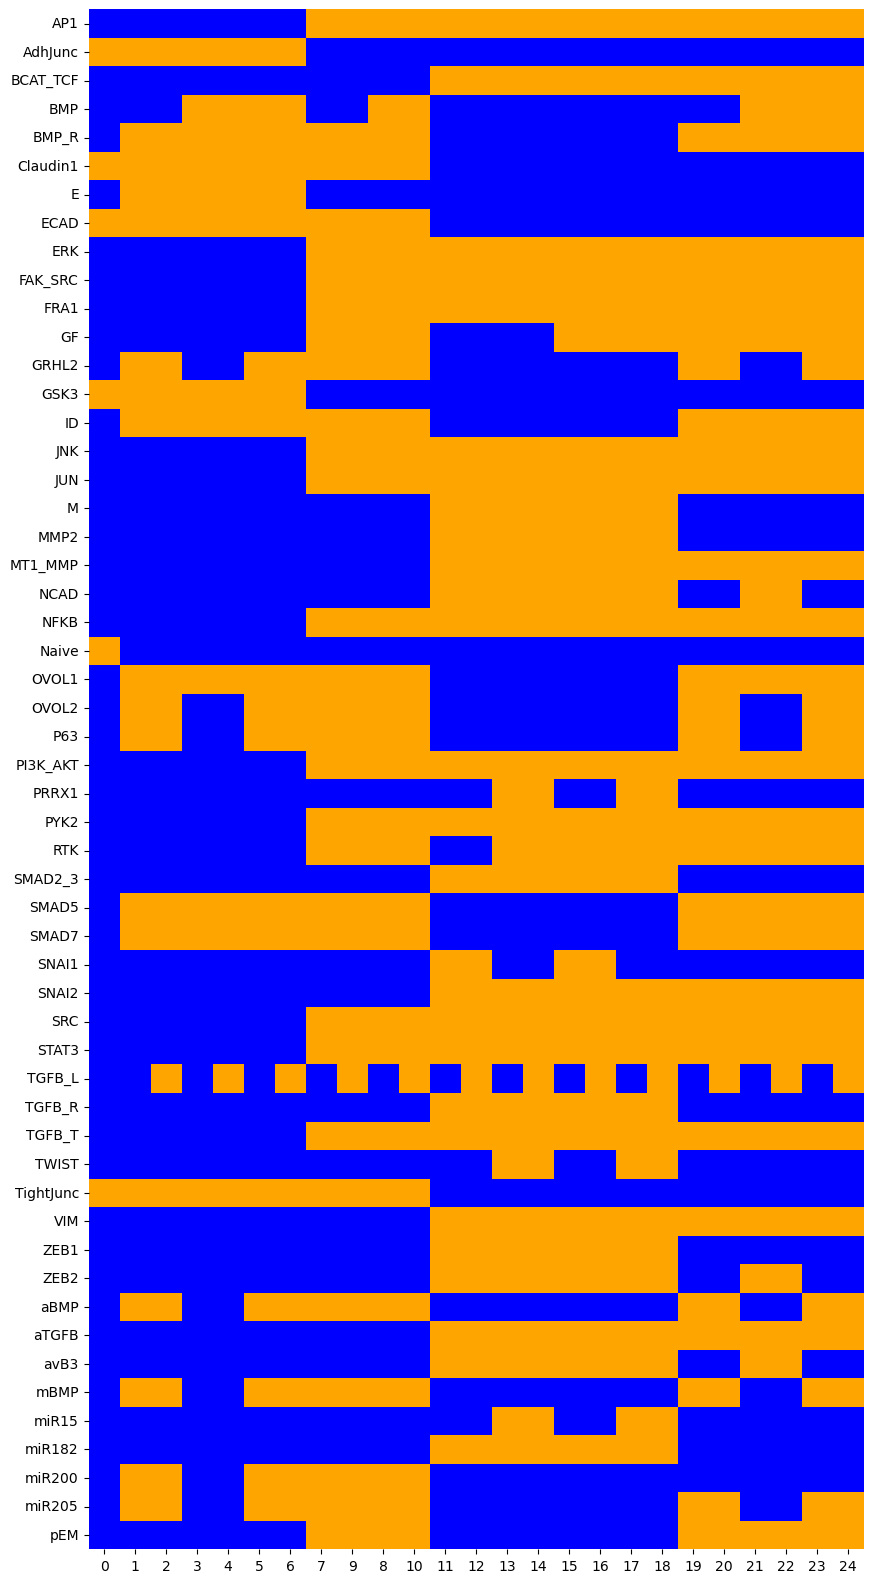

In [79]:
#Function used for plotting the dynamics of molecular species
def plotting(df):
    custom_cmap = sns.color_palette(['blue', 'orange'])
    fig = plt.figure(figsize=(10, 20))  # Adjust the figure size as needed
    sns.heatmap(df.T, cmap=custom_cmap, annot=False, cbar=False)
    plt.savefig('steady_states.png', dpi=500)
    plt.show()
    

plotting(fps_df)


Plot fixed points in a PCA

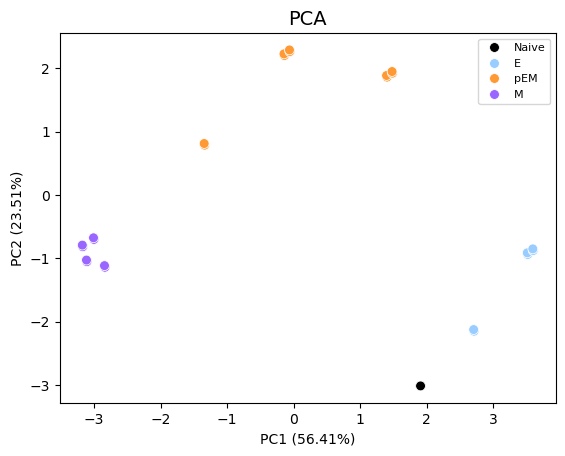

In [80]:
#Formating for PCA
ss_df=fps_df.copy()
phenotypes={}

for i in range(len(ss_df)):
    if(ss_df.loc[ss_df.index[i], 'E'] == 1):
        phenotype='E'
    elif(ss_df.loc[ss_df.index[i], 'M'] == 1):
        phenotype='M'
    elif(ss_df.loc[ss_df.index[i], 'pEM'] == 1):
        phenotype='pEM'
    elif(ss_df.loc[ss_df.index[i], 'Naive'] == 1):
        phenotype='Naive'
    else:
        phenotype='U'
    phenotypes[i]= phenotype

ss_df['Phenotype'] = phenotypes.values()
ss_df2=ss_df.drop(['M','E','pEM', 'Naive','Phenotype'], axis=1)

#PCA
pca = PCA(n_components=2)
pca.fit(ss_df2)
pca_ss = pca.transform(ss_df2)
PC1 = pca_ss[:,0]
PC2 = pca_ss[:,1]
d = {'PC1':PC1.tolist(), 'PC2':PC2.tolist(), 'phenotype':ss_df['Phenotype'].to_list()}
df = pd.DataFrame(data=d)
sns.scatterplot(data=df, x="PC1", y="PC2", hue="phenotype", palette=dict(E="#99ccff", M="#9966ff", pEM="#ff9933", Naive="black"), s=50)
variance=pca.explained_variance_ratio_*100

plt.xlabel('PC1 (%1.2f' % variance[0]+'%)', fontsize=10)
plt.ylabel('PC2 (%1.2f' % variance[1]+'%)', fontsize=10)
plt.title('PCA', fontsize=14)
plt.legend(fontsize=8)

plt.savefig('pca.png', dpi=500)

Number of fixed points per phenotype

In [82]:
ss_df.groupby('Phenotype')['Phenotype'].value_counts()

Phenotype
E         6
M         8
Naive     1
pEM      10
Name: count, dtype: int64

In [83]:
unique_ss=ss_df.drop(['M','E','pEM', 'Naive', 'TGFB_L', 'BMP', 'GF'], axis=1)
unique_ss.drop_duplicates()

,AP1,AdhJunc,BCAT_TCF,BMP_R,Claudin1,ECAD,ERK,FAK_SRC,FRA1,GRHL2,GSK3,ID,JNK,JUN,MMP2,MT1_MMP,NCAD,NFKB,OVOL1,OVOL2,P63,PI3K_AKT,PRRX1,PYK2,RTK,SMAD2_3,SMAD5,SMAD7,SNAI1,SNAI2,SRC,STAT3,TGFB_R,TGFB_T,TWIST,TightJunc,VIM,ZEB1,ZEB2,aBMP,aTGFB,avB3,mBMP,miR15,miR182,miR200,miR205,Phenotype
0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Naive
1,0,1,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,E
3,0,1,0,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,E
7,1,0,0,1,1,1,1,1,1,1,0,1,1,1,0,0,0,1,1,1,1,1,0,1,1,0,1,1,0,0,1,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1,pEM
11,1,0,1,0,0,0,1,1,1,0,0,0,1,1,1,1,1,1,0,0,0,1,0,1,0,1,0,0,1,1,1,1,1,1,0,0,1,1,1,0,1,1,0,0,1,0,0,M
13,1,0,1,0,0,0,1,1,1,0,0,0,1,1,1,1,1,1,0,0,0,1,1,1,1,1,0,0,0,1,1,1,1,1,1,0,1,1,1,0,1,1,0,1,1,0,0,M
15,1,0,1,0,0,0,1,1,1,0,0,0,1,1,1,1,1,1,0,0,0,1,0,1,1,1,0,0,1,1,1,1,1,1,0,0,1,1,1,0,1,1,0,0,1,0,0,M
19,1,0,1,1,0,0,1,1,1,1,0,1,1,1,0,1,0,1,1,1,1,1,0,1,1,0,1,1,0,1,1,1,0,1,0,0,1,0,0,1,1,0,1,0,0,0,1,pEM
21,1,0,1,1,0,0,1,1,1,0,0,1,1,1,0,1,1,1,1,0,0,1,0,1,1,0,1,1,0,1,1,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,pEM


In [84]:
ss_df.to_csv('steady_states.csv', index=False) 